## Data processing and plotting for figure10 showing voltage measured at fixed transport current before during and after irradiation, as a function of time

This notebook shows how we obtained the data for figure10 of the paper titled:

$\textit{A facility for cryogenic ion irradiation and in operando characterization of Rare-Earth Barium Copper Oxide superconducting tapes}$ by A.R Devitre, D.X. Fischer, K.B. Woller, B.C. Clark, M.P. Short, D.G. Whyte, and Z.S. Hartwig, published by the Review of Scientific Instruments. 

In particular, the notebook follows the treatment of our data treatment from raw data files (provided in ~/data/figure10/) to the production figure. This figure can be regenerated, modified, exported and reutilized according to the license of the repository (see LICENSE file).

In [1]:
%matplotlib notebook
from scipy.optimize import curve_fit
import matplotlib, matplotlib.pyplot as plt
import os, numpy as np, pandas as pd
import hts_fitting as hts

# Change this to match the destination folder with data for figure 10
parentDirectory = '../data/figure10/'
outputDirectory = '../figures/raw/'

# set a custom font
from matplotlib import font_manager
fontname = 'Century Gothic' 
fontfile = [f for f in font_manager.findSystemFonts(fontpaths='/Users/alexisdevitre/Library/Fonts') if fontname in f][0]
font_manager.fontManager.addfont(fontfile)
plt.rcParams['font.family'] = fontname

### Voltage rise at fixed transport current during 1.2 MeV x 90 nA proton beam exposure

<IPython.core.display.Javascript object>


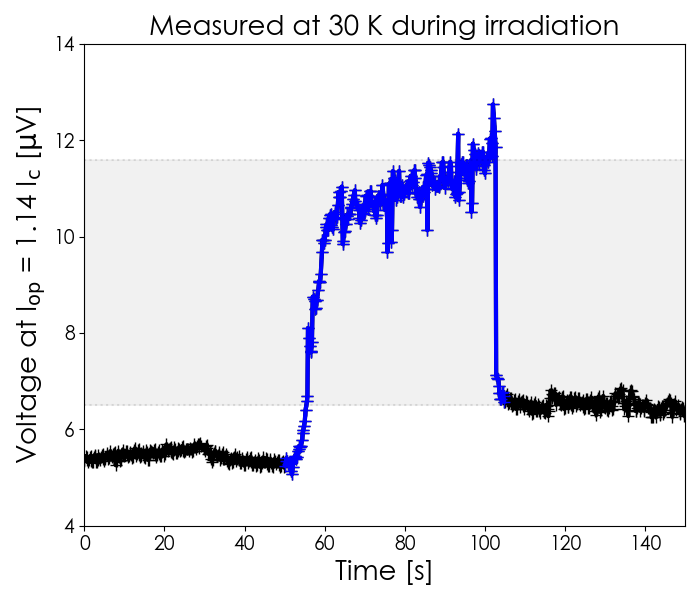

$\Delta$V = 5.3 $\mathrm{\mu} V$


In [13]:
fig, ax = plt.subplots(figsize=(7, 6))

xmin, xmax = 0, 150
v = pd.read_csv(parentDirectory+'voltage.txt', skiprows=1, delim_whitespace=True, names=['time_s', 'voltage_V'], usecols=[2,3])
v.loc[:, 'time_s'] -= 2200
cut = (50 < v.time_s) & (v.time_s < 105)
ax.plot(v.time_s, v.voltage_V/1e-6, color='k', linewidth=3, marker='+')
ax.plot(v.time_s[cut], v.voltage_V[cut]/1e-6, color='b', linewidth=3, marker='+')


intervals = [(32, 52), (97, 103), (110, 150)]
avgs = []
counter = 0
for (interval, ls) in zip(intervals, linestyles):
    cut = (interval[0] < v.time_s) & (v.time_s < interval[1])
    avgs.append(v.voltage_V[cut].mean())
    if counter > 0:
        ax.axhline(y=avgs[-1]/1e-6, xmin=0, xmax=1, color='k', alpha=.1, linestyle=':')
    counter+=1

print(r'$\Delta$V = '+'{:3.1f}'.format(avgs[0]/1e-6)+' $\mathrm{\mu} V$')

ax.fill_between(np.linspace(xmin, xmax, 1000), avgs[2]/1e-6, avgs[1]/1e-6, alpha=.3, color='lightgray')
avgs50nA = np.abs(np.array([avgs[1]-avgs[0]])/1e-6)

ax.set_title('Measured at 30 K during irradiation', fontsize=20)
ax.set_ylabel('Voltage at I$_\mathrm{op}$ = 1.14 I$_\mathrm{c}$ [$\mathrm{\mu}$V]')
ax.set_xlabel('Time [s]')
ax.set_xlim(xmin, xmax)
ax.set_yticks([4, 6, 8, 10, 12, 14])

ax.set_ylim(4, 14)

fig.tight_layout()
ax.set_rasterized(True)
plt.savefig(outputDirectory+'figure10.svg')